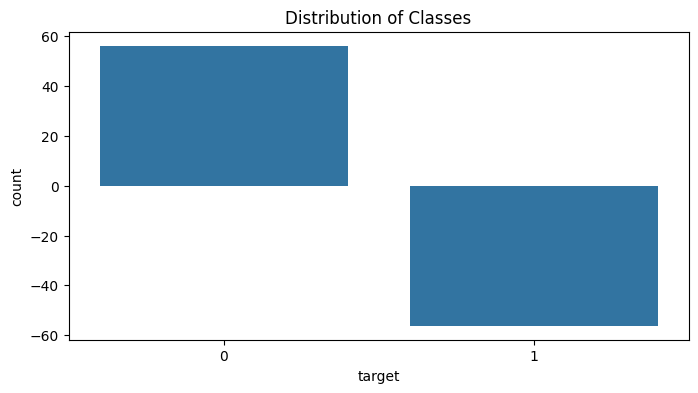

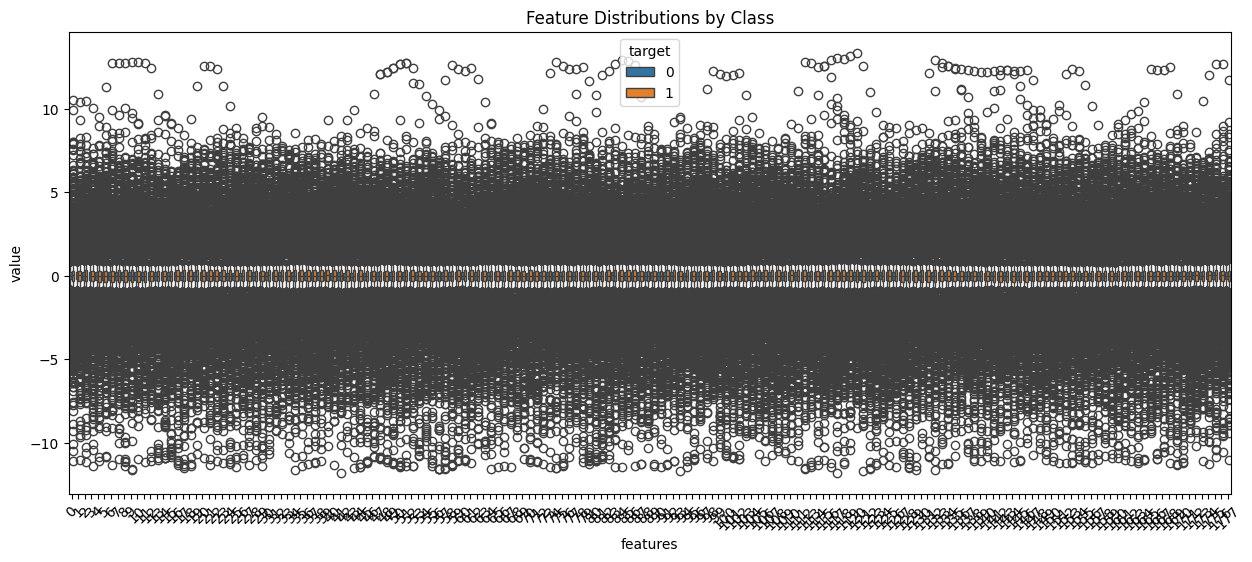

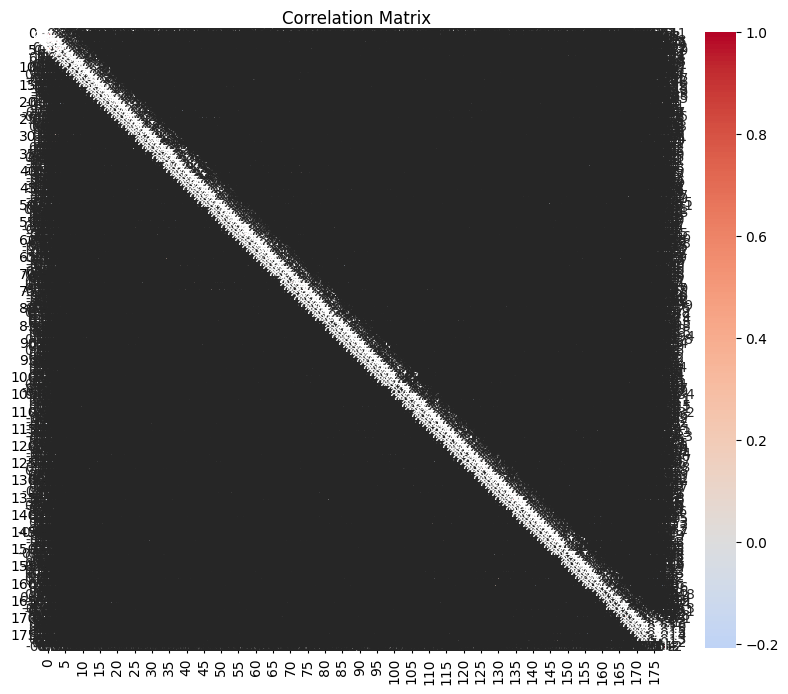

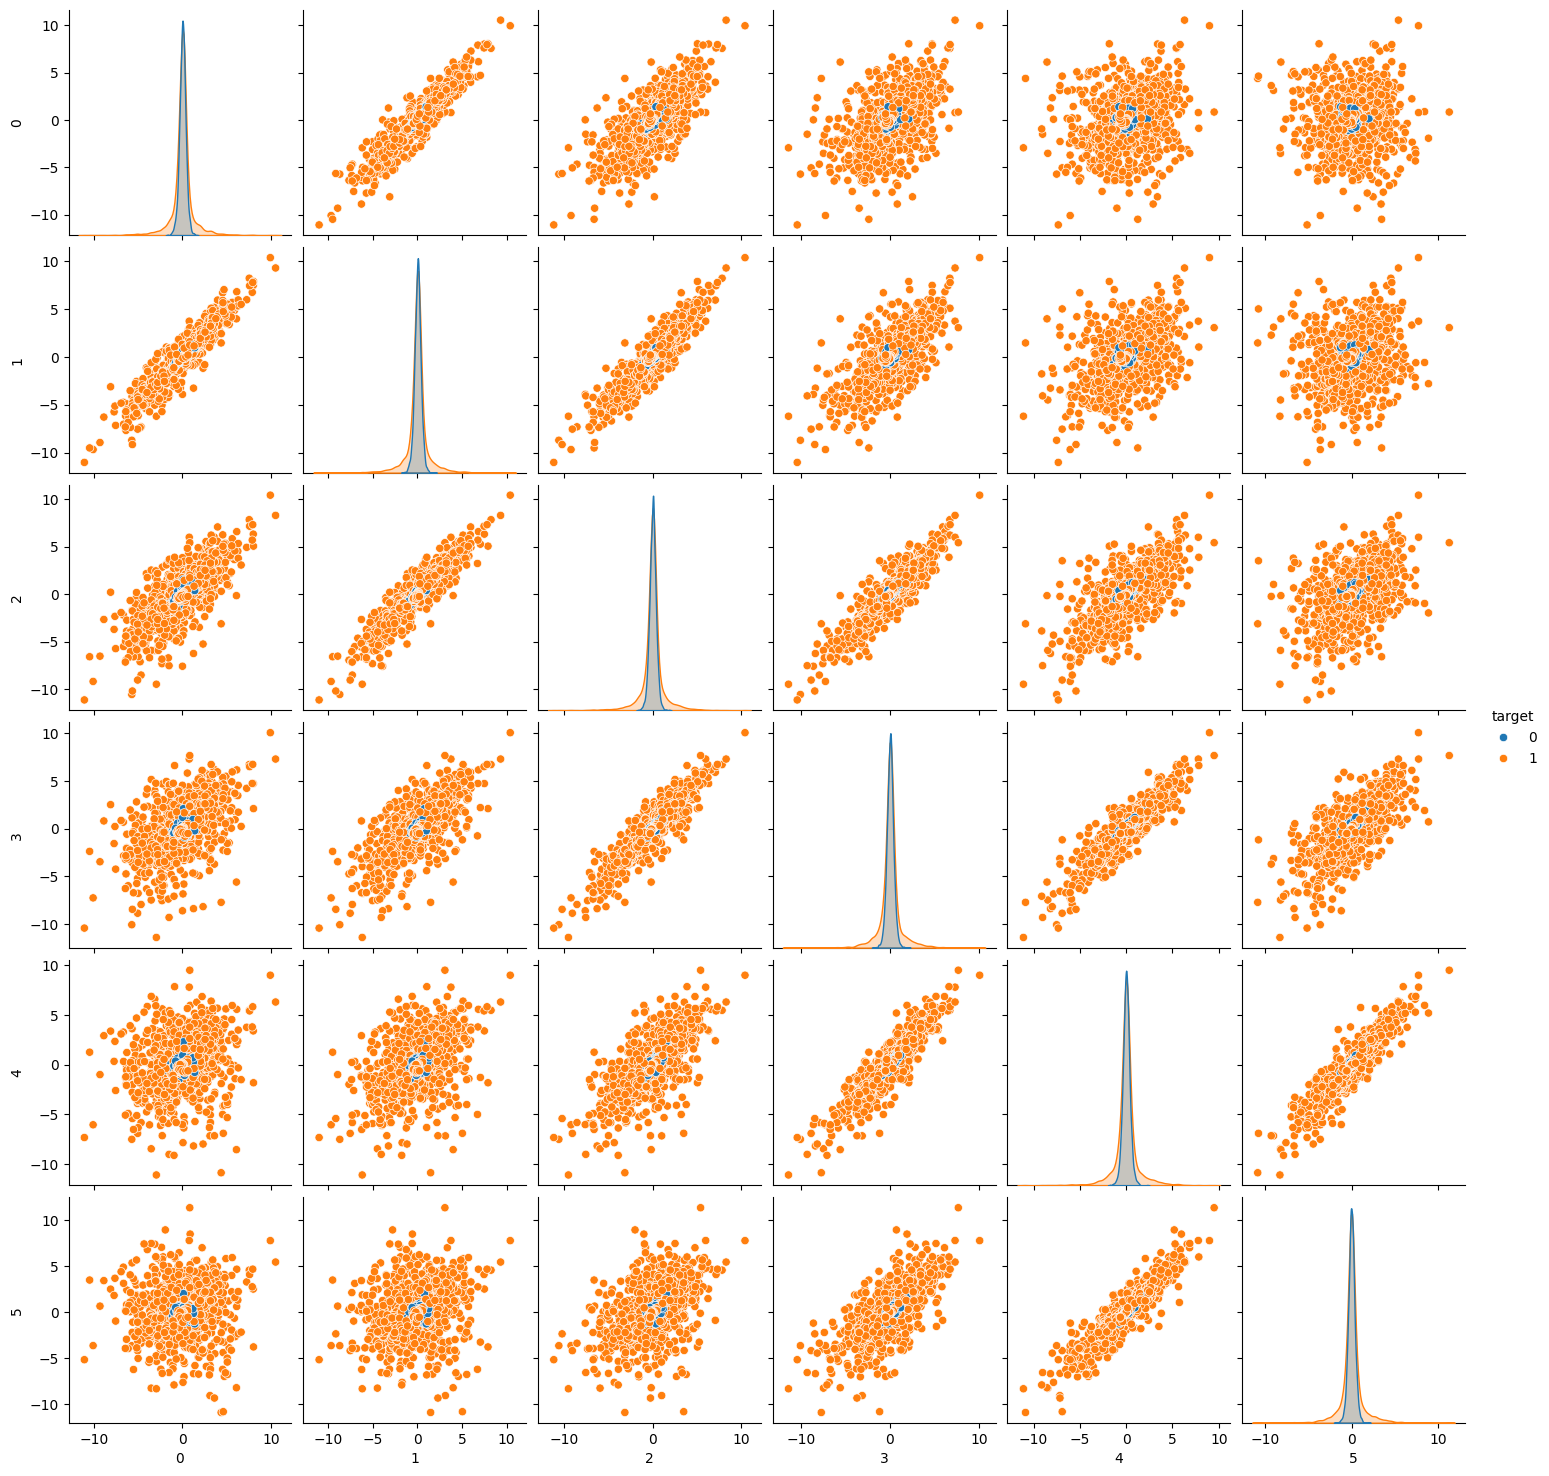

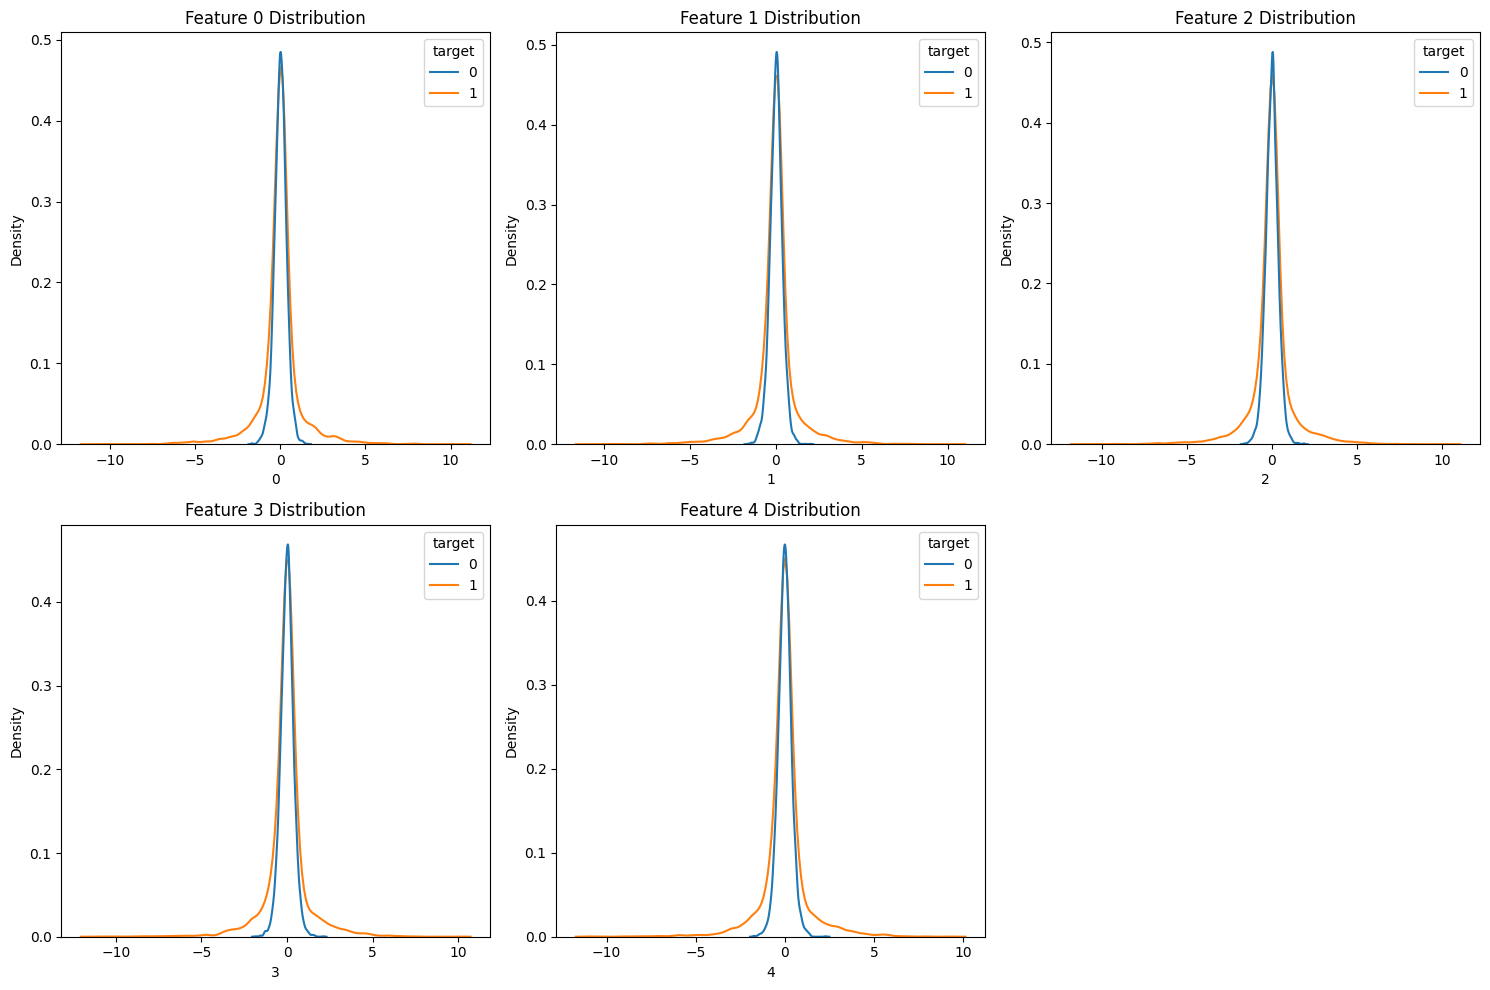

In [ ]:
from preprocess import get_prepared_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X, y = get_prepared_data()

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X)
df['target'] = y

# 1. Distribution of classes
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='target')
plt.title('Distribution of Classes')
plt.show()

# 2. Box plots for each feature by class
plt.figure(figsize=(15, 6))
df_melted = df.melt(id_vars=['target'], var_name='features')
sns.boxplot(data=df_melted, x='features', y='value', hue='target')
plt.xticks(rotation=45)
plt.title('Feature Distributions by Class')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 4. Pair plot for first 5 features
sns.pairplot(df.iloc[:, :6].join(df['target']), hue='target', diag_kind='kde')
plt.show()

# 5. Feature distributions
plt.figure(figsize=(15, 10))
for i in range(min(5, X.shape[1])):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=i, hue='target')
    plt.title(f'Feature {i} Distribution')
plt.tight_layout()
plt.show()
